# Turn TACRED slots into our slots

With this code, we are able to convert the TACRED slots into Wikidata slots thanks to the mapping done. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define TACRED relation slots
tacred2our_slots = {
    "per:charges": "per:charges",
    "per:other_family": "per:other_family",
    "per:siblings": "per:siblings",
    "per:parents": "per:parents",
    "per:children": "per:children",
    "per:spouse": "per:spouse",
    "per:religion": "per:religion",
    "per:employee_of": "per:employee_or_member_of",
    "per:title": "per:title",
    "per:schools_attended": "per:schools_attended",
    "per:stateorprovinces_of_residence": "per:place_of_residence",
    "per:countries_of_residence": "per:place_of_residence",
    "per:cities_of_residence": "per:place_of_residence",
    "per:cause_of_death": "per:cause_of_death",
    "per:city_of_death": "per:place_of_death",
    "per:stateorprovince_of_death": "per:place_of_death",
    "per:country_of_death": "per:place_of_death",
    "per:date_of_death": "per:date_of_death",
    "per:city_of_birth": "per:place_of_birth",
    "per:stateorprovince_of_birth": "per:place_of_birth",
    "per:country_of_birth": "per:place_of_birth",
    "per:date_of_birth": "per:date_of_birth",
    "per:alternate_names": "per:alternative_names",
    "org:website": "org:website",
    "org:shareholders": "org:shareholders",
    "org:city_of_headquarters": "org:headquarters_location",
    "org:stateorprovince_of_headquarters": "org:headquarters_location",
    "org:country_of_headquarters": "org:headquarters_location",
    "org:dissolved": "org:date_dissolved",
    "org:founded": "org:date_founded",
    "org:founded_by": "org:founded_by",
    "org:parents": "org:parent_organization",
    "org:subsidiaries": "org:subsidiaries",
    "org:member_of": "org:member_of",
    "org:number_of_employees/members": "org:number_of_employees_members",
    "org:political/religious_affiliation": "org:political_religious_affiliation",
    "org:alternate_names": "org:alternative_names",
    "no_relation": "no_relation",
}

# Anything outside this dictionary should be discarded as it is not a slot

In [3]:
train_data = pd.read_json("../data/tacred/train.json")
test_data = pd.read_json("../data/tacred/test.json")
valid_data = pd.read_json("../data/tacred/dev.json")

In [4]:
def tacred2our_relation(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Convert TACRED relation slots to our relation slots
    """
    for i, row in dataframe.iterrows():
        if row["relation"] in tacred2our_slots:
            dataframe.at[i, "relation"] = tacred2our_slots[row["relation"]]
        else:
            # Discard the row if it is not in our slots
            dataframe.drop(i, inplace=True)

    return dataframe

In [5]:
print("Converting training data...")
train_data = tacred2our_relation(train_data)

print("Converting testing data...")
test_data = tacred2our_relation(test_data)

print("Converting validation data...")
valid_data = tacred2our_relation(valid_data)

Converting training data...
Converting testing data...
Converting validation data...


In [6]:
train_data.head()

,id,docid,relation,token,subj_start,subj_end,obj_start,obj_end,subj_type,obj_type,stanford_pos,stanford_ner,stanford_head,stanford_deprel
0,61b3a5c8c9a882dcfcd2,AFP_ENG_20070218.0019.LDC2009T13,org:founded_by,"[Tom, Thabane, resigned, in, October, last, ye...",10,12,0,1,ORGANIZATION,PERSON,"[NNP, NNP, VBD, IN, NNP, JJ, NN, TO, VB, DT, D...","[PERSON, PERSON, O, O, DATE, DATE, DATE, O, O,...","[2, 3, 0, 5, 3, 7, 3, 9, 3, 13, 13, 13, 9, 15,...","[compound, nsubj, ROOT, case, nmod, amod, nmod..."
1,61b3a65fb9b7111c4ca4,NYT_ENG_20071026.0056.LDC2009T13,no_relation,"[In, 1983, ,, a, year, after, the, rally, ,, F...",9,9,19,20,PERSON,PERSON,"[IN, CD, ,, DT, NN, IN, DT, NN, ,, NNP, VBD, D...","[O, DATE, O, DURATION, DURATION, O, O, O, O, P...","[2, 11, 11, 5, 11, 8, 8, 5, 11, 11, 0, 16, 16,...","[case, nmod, punct, det, nmod:tmod, case, det,..."
2,61b3a65fb9aeb61c81e7,eng-NG-31-126955-9171242,no_relation,"[This, was, among, a, batch, of, paperback, Ox...",26,26,7,8,ORGANIZATION,ORGANIZATION,"[DT, VBD, IN, DT, NN, IN, NN, NNP, NNP, POS, N...","[O, O, O, O, O, O, O, ORGANIZATION, ORGANIZATI...","[5, 5, 5, 5, 0, 11, 9, 9, 11, 9, 5, 15, 15, 15...","[nsubj, cop, case, det, ROOT, case, compound, ..."
3,61b3a65fb9c9956eccbc,APW_ENG_20100119.0780,no_relation,"[The, latest, investigation, was, authorized, ...",55,55,28,29,ORGANIZATION,NUMBER,"[DT, JJS, NN, VBD, VBN, IN, DT, NNP, NNP, IN, ...","[O, O, O, O, O, O, O, ORGANIZATION, ORGANIZATI...","[3, 3, 5, 5, 0, 9, 9, 9, 5, 11, 5, 5, 21, 13, ...","[det, amod, nsubjpass, auxpass, ROOT, case, de..."
4,61b3a65fb9197aba87ff,APW_ENG_20070501.0905.LDC2009T13,no_relation,"[The, event, is, a, response, to, a, White, Ho...",23,26,13,13,ORGANIZATION,DATE,"[DT, NN, VBZ, DT, NN, TO, DT, NNP, NNP, NN, NN...","[O, O, O, O, O, O, O, ORGANIZATION, ORGANIZATI...","[2, 5, 5, 5, 16, 12, 12, 12, 12, 12, 12, 5, 14...","[det, nsubj, cop, det, ccomp, case, det, compo..."


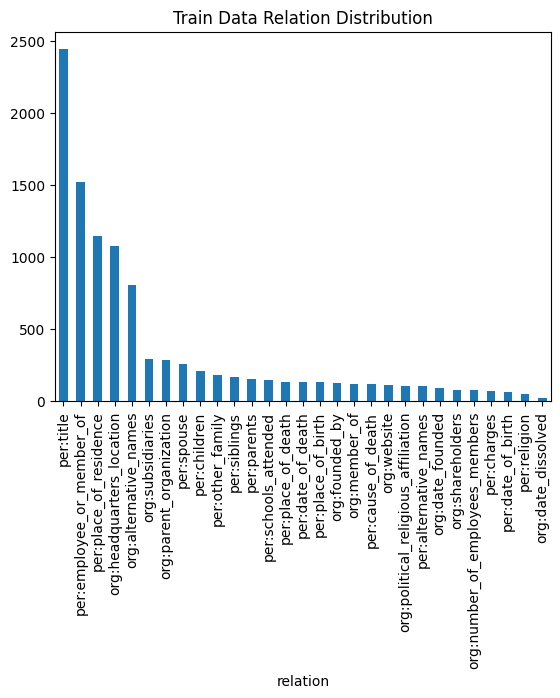

In [10]:
def plot_relation_distribution(dataframe: pd.DataFrame, title: str):
    """
    Plot the distribution of relations in a column plot, excluding no_relation
    """
    relation_distribution = dataframe["relation"].value_counts()
    relation_distribution = relation_distribution.drop("no_relation")
    relation_distribution.plot(kind="bar", title=title)
    plt.show()


plot_relation_distribution(train_data, "Train Data Relation Distribution")

In [8]:
train_data.to_csv("../data/tacred/train.csv")
test_data.to_csv("../data/tacred/test.csv")
valid_data.to_csv("../data/tacred/valid.csv")